In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import time
import pandas as pd
import pickle
repoDir= os.getcwd()
os.chdir(os.path.join(repoDir , '..' ))
repoDir= os.getcwd()

In [2]:
filenames= [f for f in os.listdir('chipsPerVisitData/') if any([f.endswith('pickle')])]
savedData= {}

for filename in filenames:
    splits= filename.split('_')
    if (len(splits)==8):
        key= splits[4]+'_'+splits[5]
    else:
        key= splits[4]
    with open('chipsPerVisitData/'+filename, 'rb') as handle:
        savedData[key]= pickle.load(handle)

### Wavefront sensors
- R:4,0 S:0,2,[A,B]
- R:0,4 S:2,0,[A,B]
- R:0,0 S:2,2,[A,B]
- R:4,4 S:0,0,[A,B]

In [3]:
wavefront= ['R:4,0 S:0,2,A', 'R:4,0 S:0,2,B','R:0,4 S:2,0,A', 'R:0,4 S:2,0,B',
           'R:0,0 S:2,2,A', 'R:0,0 S:2,2,B','R:4,4 S:0,0,A', 'R:4,4 S:0,0,B']

RandomDitherFieldPerVisit_randomRotDithered
** All chips (including wavefront) **
-- Max number of chips added by any given visit: 191
-- Min number of chips added by any given visit: 1
-- Total number of chips (across all visits to be simulated): 131052

** Non-wavefront chips **
-- Max number of chips added by any given visit: 184
-- Min number of chips added by any given visit: 1
-- Total number of chips (across all visits to be simulated): 127400



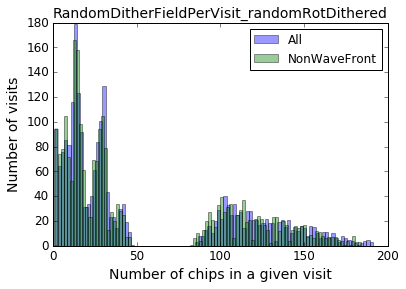

NoDither
** All chips (including wavefront) **
-- Max number of chips added by any given visit: 196
-- Min number of chips added by any given visit: 11
-- Total number of chips (across all visits to be simulated): 207704

** Non-wavefront chips **
-- Max number of chips added by any given visit: 188
-- Min number of chips added by any given visit: 9
-- Total number of chips (across all visits to be simulated): 197318



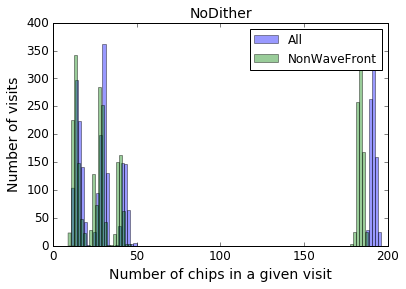

RandomDitherFieldPerVisit
** All chips (including wavefront) **
-- Max number of chips added by any given visit: 191
-- Min number of chips added by any given visit: 1
-- Total number of chips (across all visits to be simulated): 131004

** Non-wavefront chips **
-- Max number of chips added by any given visit: 183
-- Min number of chips added by any given visit: 1
-- Total number of chips (across all visits to be simulated): 127351



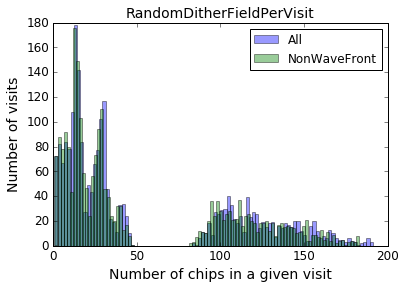

In [4]:
for key in savedData:
    numChipsAll= []
    numChipToSim= []
    print key
    for i in range(len(savedData[key]['obsHistID'])):
        
        temp= savedData[key]['chipNames'][i]
        
        numChipsAll.append(len(temp))
        
        temp= list(set(temp)-set(wavefront))
        numChipToSim.append(len(temp))
        
    print '** All chips (including wavefront) **'
    print '-- Max number of chips added by any given visit: %d'%(max(numChipsAll))
    print '-- Min number of chips added by any given visit: %d'%(min(numChipsAll))
    print '-- Total number of chips (across all visits to be simulated): %d\n'%(sum(numChipsAll))   
    
    print '** Non-wavefront chips **'
    print '-- Max number of chips added by any given visit: %d'%(max(numChipToSim))
    print '-- Min number of chips added by any given visit: %d'%(min(numChipToSim))
    print '-- Total number of chips (across all visits to be simulated): %d\n'%(sum(numChipToSim))
 
    bins= 100
    alpha= 0.4
    fontsize= 14
    plt.hist(numChipsAll, label= 'All', alpha= alpha, bins= bins)
    plt.hist(numChipToSim, label= 'NonWaveFront', alpha= alpha, bins= bins)
    plt.title(key, fontsize= fontsize)
    plt.legend()
    plt.xlabel('Number of chips in a given visit', fontsize= fontsize)
    plt.ylabel('Number of visits', fontsize= fontsize)
    plt.legend(loc= 1)#bbox_to_anchor= (1.5,0.5))
    plt.tick_params(axis='x', labelsize=fontsize-2)
    plt.tick_params(axis='y', labelsize=fontsize-2)
    plt.show()

In [5]:
key= 'RandomDitherFieldPerVisit_randomRotDithered'
savedData[key].keys()

['fIDs', 'chipNames', 'obsHistID', 'expDate']

In [6]:
print np.unique(savedData[key]['fIDs'])
print len(np.unique(savedData[key]['fIDs']))

[1212 1220 1234 1305 1323 1333 1365 1413 1431 1447 1464 1542 1564 1568]
14


In [7]:
len(np.unique(savedData[key]['expDate']))

2395

In [8]:
len(np.unique(savedData[key]['obsHistID']))

2395

### Plot number of visits for each fID across the full survey

In [9]:
color= ['r', 'b',  'g']
color2= ['b', 'c',  'm']
sym= ['+', 'o',  'x']

RandomDitherFieldPerVisit_randomRotDithered
NoDither
RandomDitherFieldPerVisit


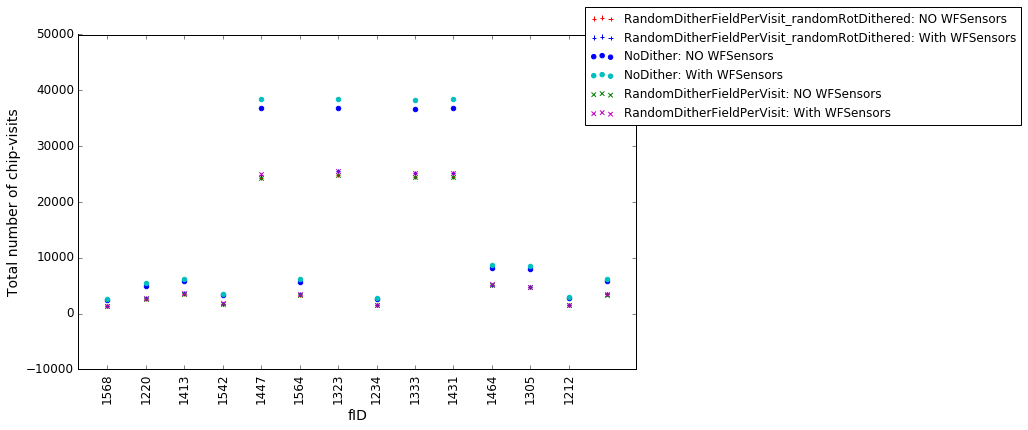

In [10]:
for ind, key in enumerate(savedData):
    IDvisit_wWFsensors= {}
    IDvisit_woWFsensors= {}
    print key
    for i in range(len(savedData[key]['obsHistID'])):
        
        ID= savedData[key]['fIDs'][i]
        if len(ID)>1:
            print 'Problem?'
        ID= ID[0]
        
        if ID not in IDvisit_woWFsensors.keys():
            IDvisit_woWFsensors[ID]= 0
            IDvisit_wWFsensors[ID]= 0
        else:
            temp= savedData[key]['chipNames'][i]
            IDvisit_wWFsensors[ID]+= len(temp)
            temp= list(set(temp)-set(wavefront))
            IDvisit_woWFsensors[ID]+= len(temp)
        
    bins= 100
    alpha= 0.4
    fontsize= 14
    
    pltCount= 0
    prevCount= 0
    for j, key2 in enumerate(IDvisit_woWFsensors):
        if (j==len(IDvisit_woWFsensors)-1):
            plt.scatter(j, IDvisit_woWFsensors[key2], marker= sym[ind], 
                        label= key+ ': NO WFSensors', color= color[ind]) # label= 'All', )#alpha= alpha, bins= bins)
            plt.scatter(j, IDvisit_wWFsensors[key2], marker= sym[ind], 
                        label= key+': With WFSensors', color= color2[ind]) # label= 'All', )#alpha= alpha, bins= bins)
        else:
            plt.scatter(j, IDvisit_woWFsensors[key2], marker= sym[ind], color= color[ind] )#alpha= alpha, bins= bins)
            plt.scatter(j, IDvisit_wWFsensors[key2], marker= sym[ind], color= color2[ind] )#alpha= alpha, bins= bins)
    plt.xlabel('fID', fontsize= fontsize)
    plt.ylabel('Total number of chip-visits', fontsize= fontsize)
    my_xticks = IDvisit_woWFsensors.keys() #['John','Arnold','Mavis','Matt']
    plt.xticks(range(j), my_xticks)
    ax= plt.axes()
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)

    plt.tick_params(axis='x', labelsize=fontsize-2)
    plt.tick_params(axis='y', labelsize=fontsize-2)

plt.legend(bbox_to_anchor= (1.7,1.1))
fig= plt.gcf()
fig.set_size_inches(10,6)

plt.show()



In [11]:
def ID_Hist(sameXRange):
    if sameXRange:
        bins= 10
    else:
        bins= 50
    alpha= 0.4
    fontsize= 14

    for ID in IDvisit_woWFsensors.keys():
        for key in savedData:
            numChipsAll= []
            numChipToSim= []
            #print key
            for i in range(len(savedData[key]['obsHistID'])):

                if (savedData[key]['fIDs'][i]==ID):
                    temp= savedData[key]['chipNames'][i]

                    numChipsAll.append(len(temp))

                    temp= list(set(temp)-set(wavefront))
                    numChipToSim.append(len(temp))


            #plt.hist(numChipsAll, label= key + ' All', alpha= alpha, bins= bins)
            plt.hist(numChipToSim, label= key + ' NonWaveFront', alpha= alpha, bins= bins)
        plt.title('fID:%s '%ID, fontsize= fontsize)
        plt.legend()
        plt.xlabel('Number of chips in a given visit', fontsize= fontsize)
        plt.ylabel('Number of visits', fontsize= fontsize)
        plt.legend(bbox_to_anchor= (2.5,0.5))
        plt.tick_params(axis='x', labelsize=fontsize-2)
        plt.tick_params(axis='y', labelsize=fontsize-2)
        if sameXRange:
            plt.xlim(0,200)
        #plt.xlim(0,200)
        plt.show()

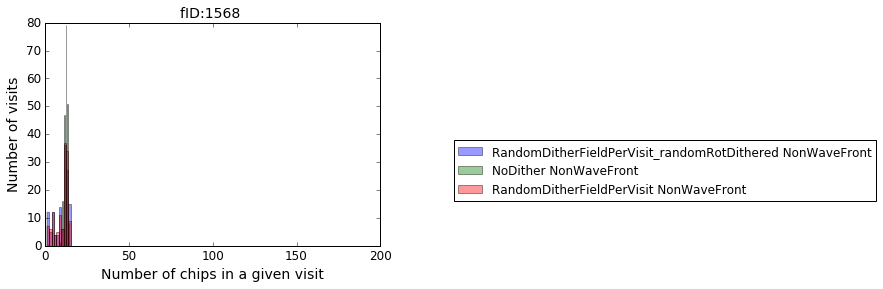

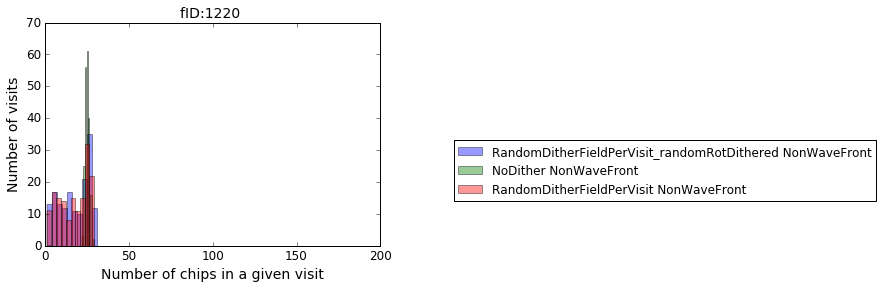

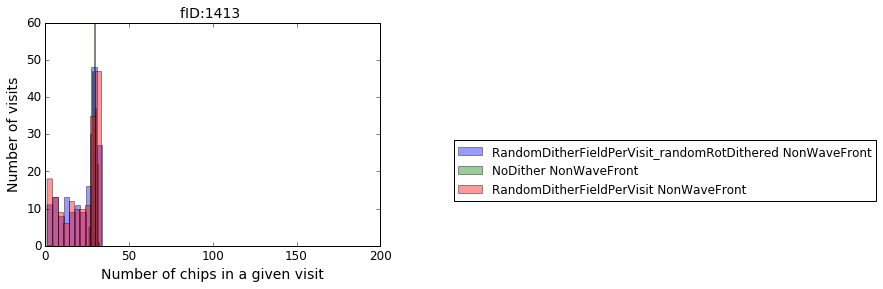

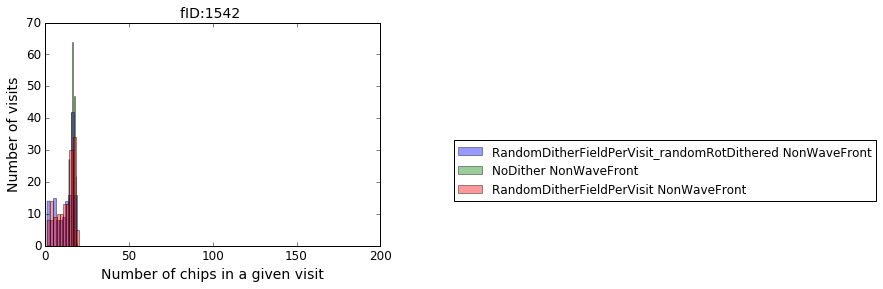

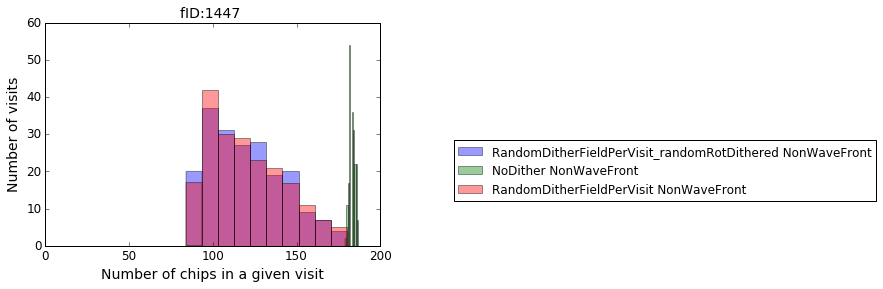

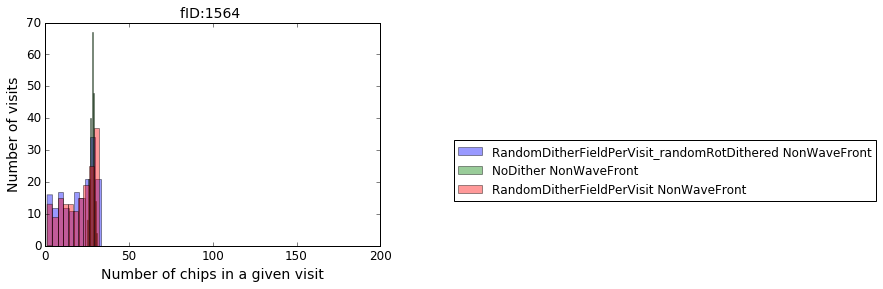

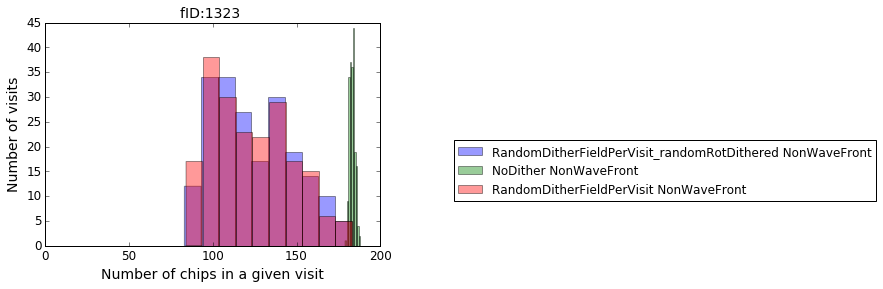

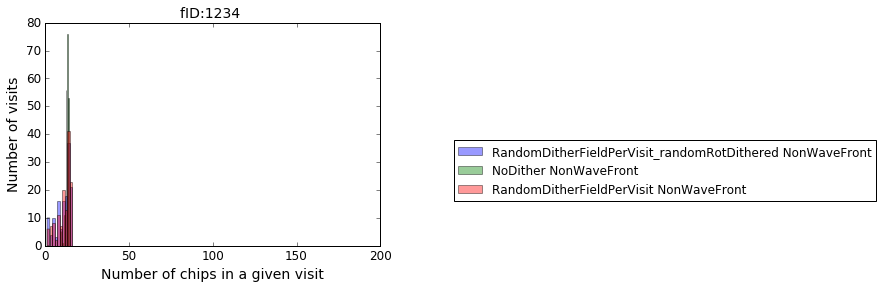

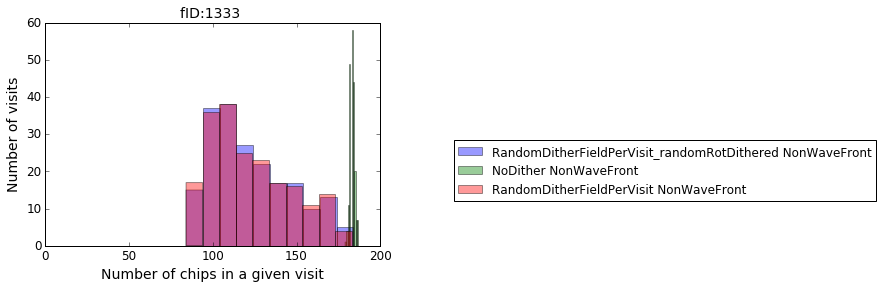

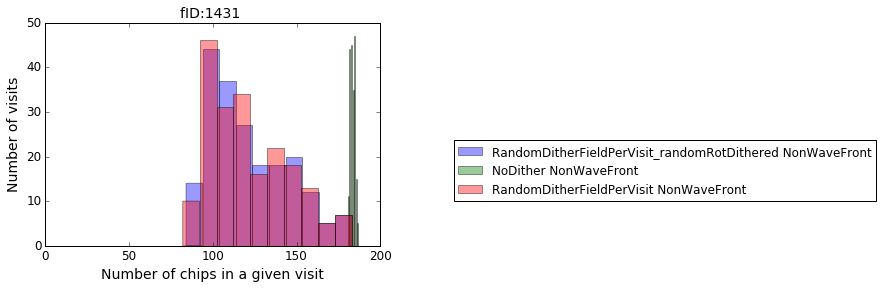

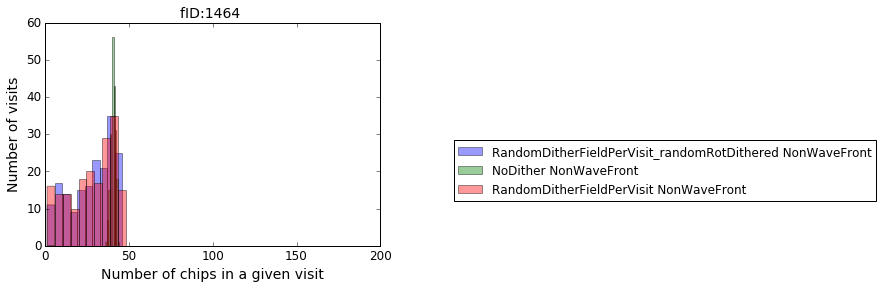

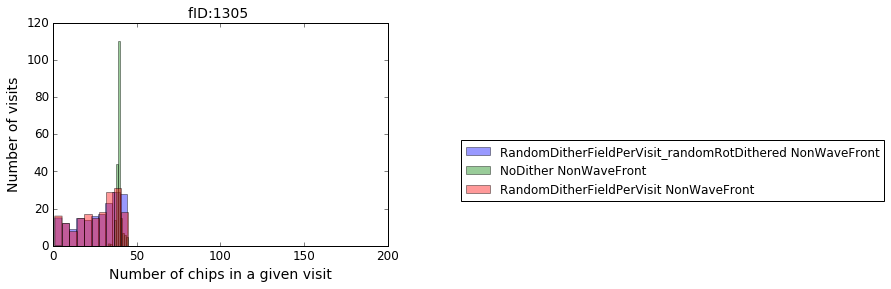

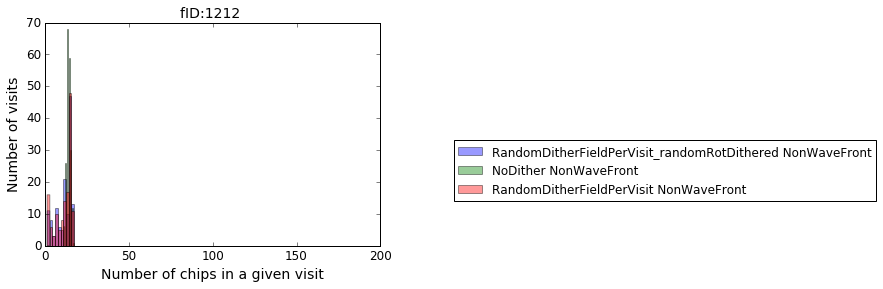

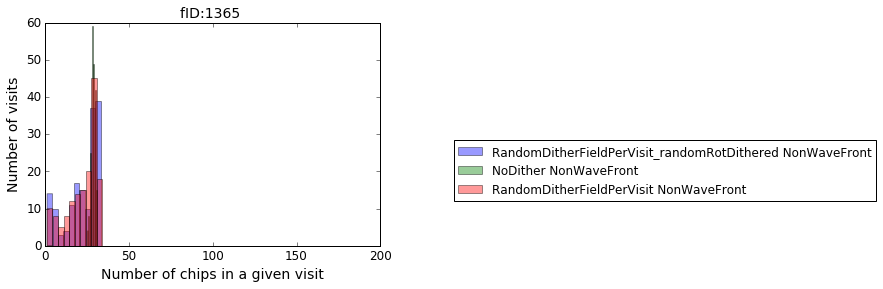

In [12]:
ID_Hist(sameXRange= True)

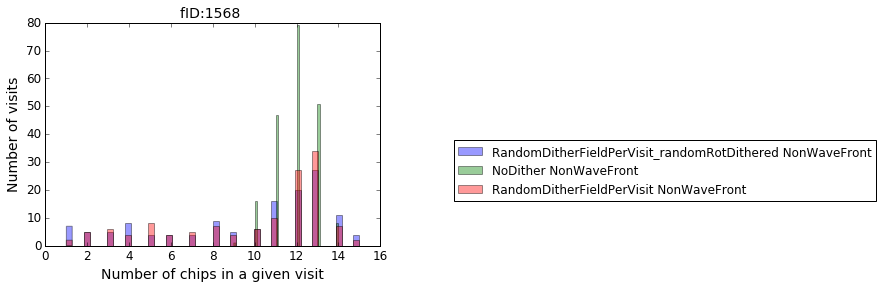

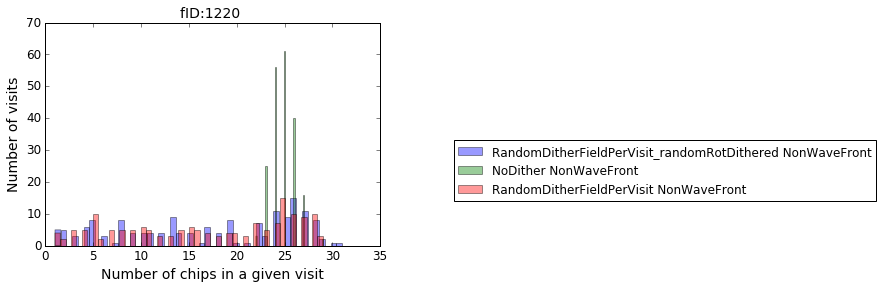

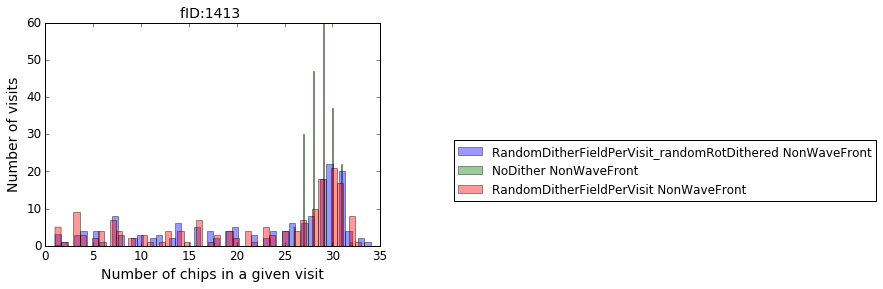

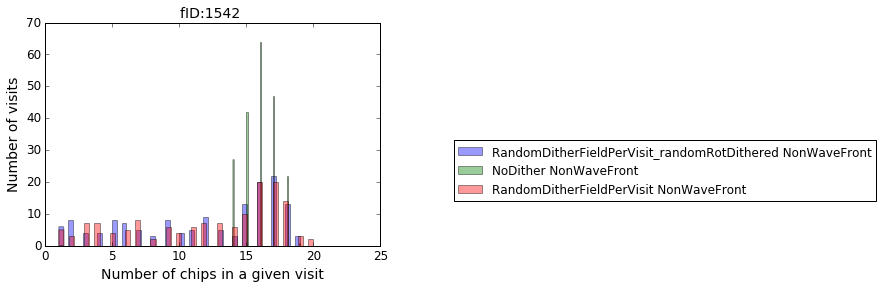

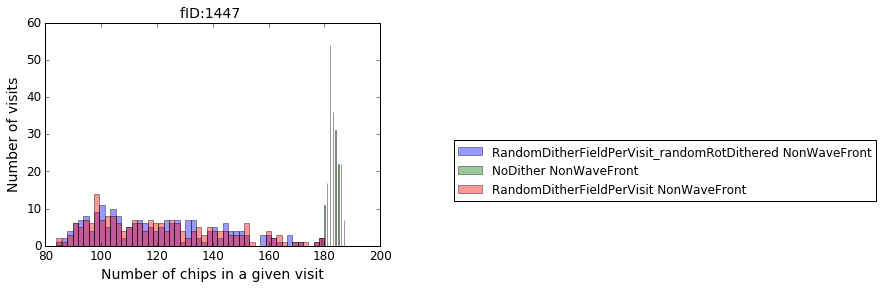

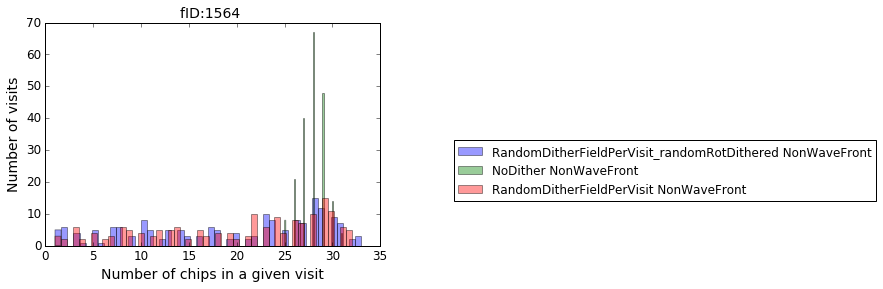

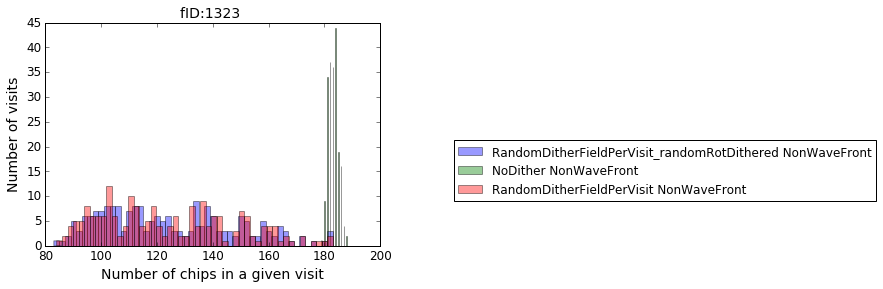

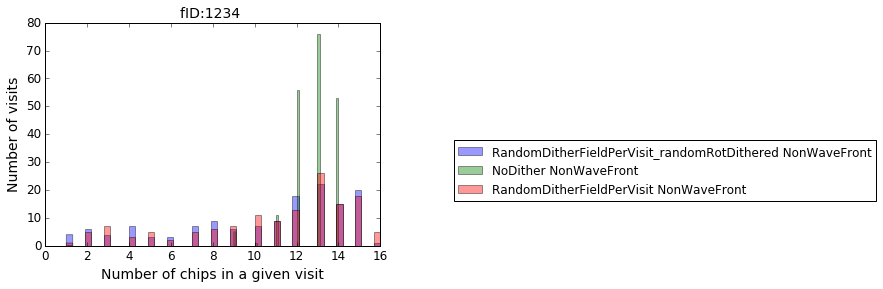

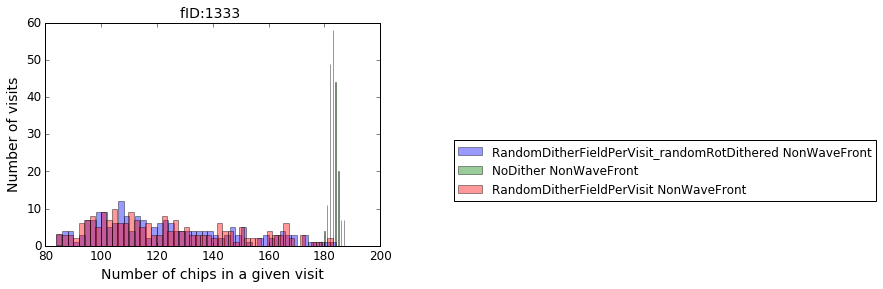

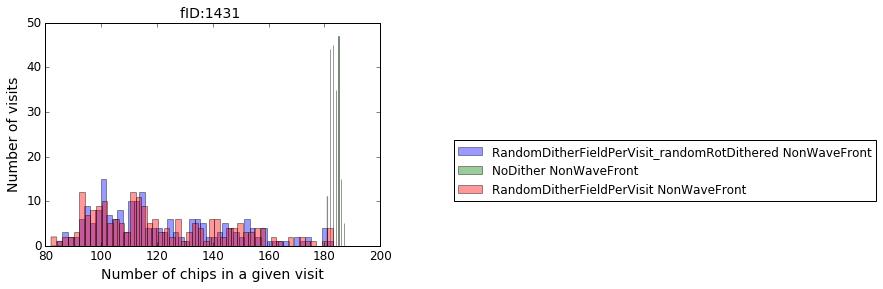

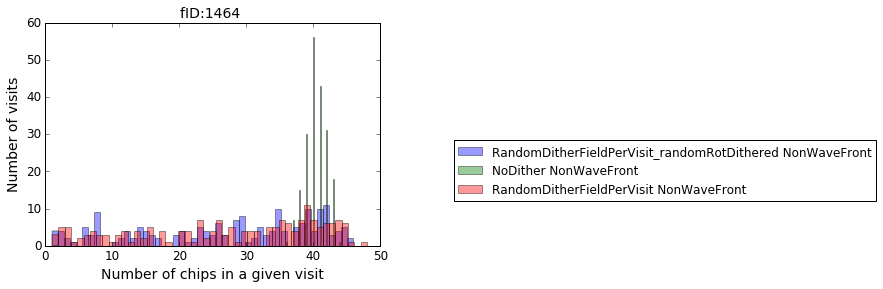

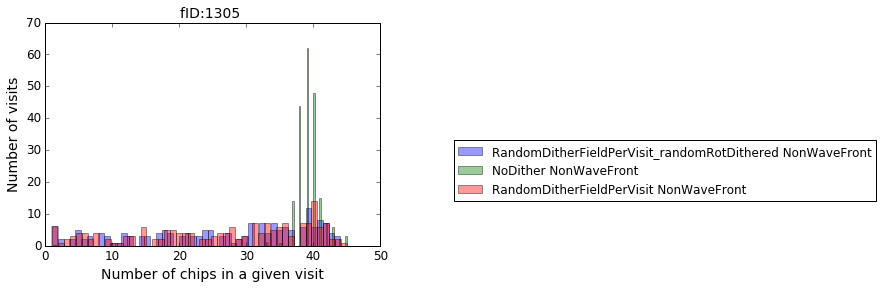

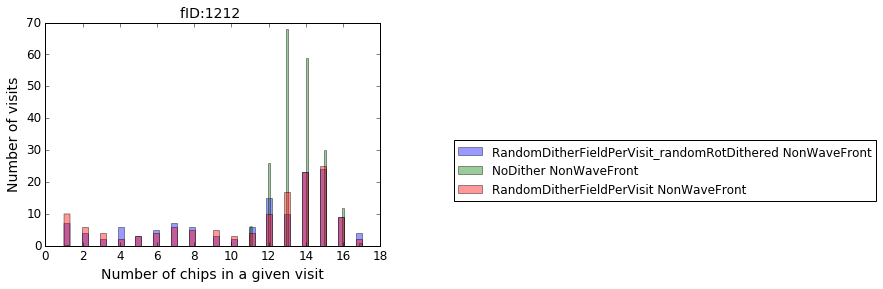

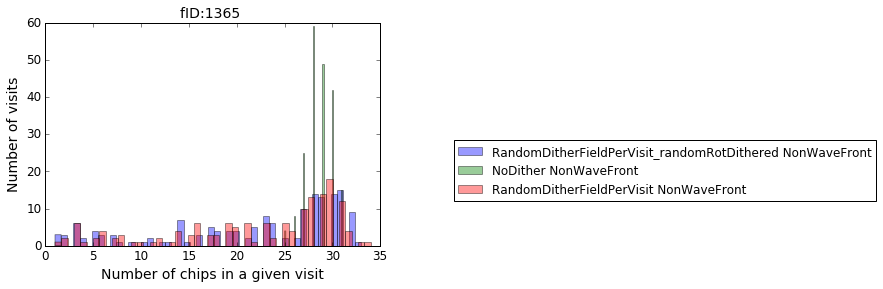

In [13]:
ID_Hist(sameXRange= False)